# Lab 05: Factor analysis 2

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course


## Learning goals:

* Apply and improve your knowledge of Python and Jupyter
* Continue practicing with factor analysis
    * Learn about data pretreatment (scaling and normalization)
    * Apply principle component analysis on time series
    * Interpret PCA results in a real-world example to learn more about relationships within a dataset
* Develop a feeling for how statistical tools can help you, but you still require *your interpretation* to draw conclusions.

## Introduction
In the last lab, you have become familiar with **Principle Component Analysis** and have learned to interpret the *scores*, *loadings* and *eigenvalues* that define the outcome of a PCA. In this lab, we will practice a bit more with this data analysis method and apply it on a realistic time series to discover how we can use PCA as a tool in the Earth Sciences.

As always, let's start by loading the packages we will need.

**Exercise 1:** In the code box below, load the packages `numpy`, `pyplot` and `preprocessing` (found in the `sklearn` package) and import the functions `PCA` (from `sklearn.decomposition`) and `loadmat` (from `scipy.io`).

In [1]:
# Make sure our figures show up in Jupyter
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA

The latter of these functions we will need to load the data for this lab. This dataset (`lab05.mat`) is provided as a Matlab table (`.mat`-file) and requires a special function to load:

In [2]:
lab05 = loadmat('lab05.mat')

The `lab05` file contains data on drainage ($m^{3}/s$), water temperature ($°C$), and dissolved chlorophyll ($μg/l$), nitrogen ($mg/l$) and phosphate ($mg/l$) in the Rhine at Lobith, where the Rhine enters the Netherlands, starting from 1989.

When loading a `.mat` file `scipy.io` returns a dictionary with variable names as keys, and matrices as values. The data matrix contains all these variables (column 1: temperature, column 2: drainage, column 3: chlorophyll, column 4: nitrogen, column 5: phosphate). You can for example print this matrix using the following command:

In [ ]:
print(lab05['data'])
print(lab05['data'].shape) # OPTIONAL: You can easily check the shape of the data matrix here.

[[8.200e+00 2.567e+03 2.000e+00 1.610e+00 1.690e-01]
 [7.300e+00 1.660e+03 3.000e+00 1.430e+00 1.620e-01]
 [7.300e+00 1.279e+03 3.000e+00 2.100e+00 1.720e-01]
 ...
 [1.060e+01 1.486e+03 2.000e+00 4.400e-01 1.100e-01]
 [1.080e+01 1.439e+03 2.000e+00 5.600e-01 9.300e-02]
 [8.600e+00 1.740e+03 2.000e+00 9.400e-01 9.100e-02]]
(426, 5)


All measurements are ordered according to time of observation. The vector `T`, in the dictionary `lab05`, gives the day since January 1, 1989.

Chlorophyll are the pigments in green plants that capture energy/light for photosynthesis. Chlorophyll in water relates to the concentration of algae. Algae are more abundant in summer, when temperatures are warmer. Algae need nitrogen and phosphate for their growth. So, when there are lots of algae the concentrations of N and P are reduced. The main source of N and P in river water is polluted water from households and industries. Because of that, N and P concentrations may be influenced by changes in environmental laws and restrictions. These have more influence on N concentrations, than P concentrations because the latter are difficult to remove from polluted water. Water temperature and drainage are strongly seasonally dependent. In summer, temperature is high and drainage low, while the opposite occurs in winter.

**Question 1:** After reading the information about the variables and their units in this dataset above, can you think of a potential issue we will encounter when combining all these variables in one data analysis?

**Answer 1:** The variables have very different units and will have large variations in the types of values they will contain. Variables with units that have large numbers will have a much stronger effect on the outcome of our data analysis than variables with smaller numbers.

Before we apply a PCA, we need to standardize our dataset so that all variables receive equal weight in the PCA. You can do this using the following commands:

In [4]:
scaler = preprocessing.StandardScaler() # Define the preprocessing function we will apply to our data
standardized_data = scaler.fit_transform(lab05['data']) # Apply the preprocessing on our dataset

Note that the syntax we use here to do our preprocessing is very similar to how we ran our PCA in Lab04 (have a look back at that lab in case you forgot!): We first define a preprocessing routine and then apply that routine on our data using the `.fit_transform()`-syntax.

**Question 2:** What would happen in the PCA if you would not standardize your dataset?

**Answer 2:** The variables whose unit gives them much higher values will have a disproportionally strong influence on the outcome of your PCA.

**Exercise 2:** In lab 04, we already implemented a PCA. Have a look in lab 04 which commands we used to execute a PCA. Then apply these commands to the standardized data matrix. Don't forget to extract the *scores*, *loadings* and *eigenvalues* from the result.

In [5]:
pca = PCA() # We first call the PCA function to create our PCA object
scores = pca.fit_transform(standardized_data) # Now we apply the new pca object to our data to get our PCA scores
loadings = np.transpose(pca.components_) # Create a new object with loadings in columns ordered from highest to least amount of explained variance.
percent_explained = 100 * pca.explained_variance_ / np.sum(pca.explained_variance_)
print(percent_explained)
print(np.sum(pca.explained_variance_))

[33.7030202  26.14073149 21.84134416 11.48326816  6.831636  ]
5.011764705882351


**Exercise 3:** Plot the percentage of variance explained by each principle component.

Text(0.5, 1.0, 'Eigenvalues per component')

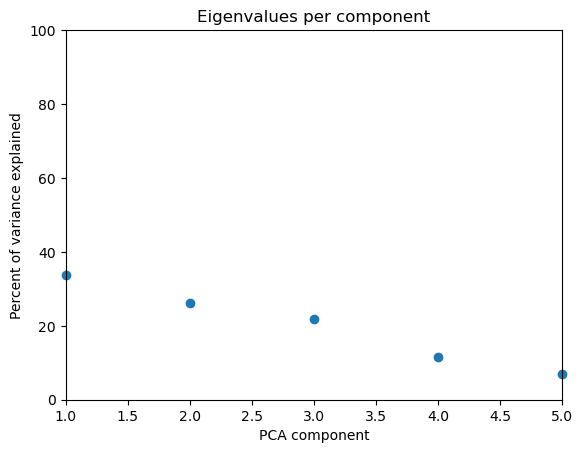

In [11]:
a = np.arange(1, 6) # Create a vector with numbers for the components
plt.figure(1)
plt.plot(a, percent_explained, 'o', clip_on = False) # Plot scatter plot of eigenvalues for each component.
plt.xlim([1, 5]) # Set the limits for the horizontal axis
plt.ylim([0, 100]) # Set the limits for the vertical axis
plt.xlabel('PCA component') # Provide label for horizontal axis
plt.ylabel('Percent of variance explained') # Provide label for vertical axis
plt.title('Eigenvalues per component') # Set the plot title

I think you would agree that this result looks quite a bit different from the result we obtained in **Lab04**!

**Question 3:** Describe the main difference you observe with respect to the dataset in Lab04. What does this result tell you about this dataset compared to the one we used before?

**Answer 3:** The amount of variance explained by different PCs is much closer in this dataset, making it harder to decide on where to draw the line on which components to include. Contrary to the dataset in Lab04, the data in this lab cannot be explained by a simple combination of two components. In many ways, it is a more complex dataset.

**Question 4:** How many principal components would you withhold in your analysis and why?

**Answer 4:** I would withhold the first three components, because these together explain almost 82% of the variance. From the data description it also seems like we need three components to explain the complex interplay of variables in this dataset: drainage, temperature and chlorophyl/productivity.

Let’s have a look at which variables strongly influence the first three principal components to try to make an interpretation about what these principal components may represent.

**Question 5:** Which outcome of the PCA do we need to consider to check which variables are important for which principle components?

**Answer 5:** We need to look at the *loadings*.

Plotting this outcome may help. Below is an example for the first principal component:

Text(0, 0.5, 'PC loading')

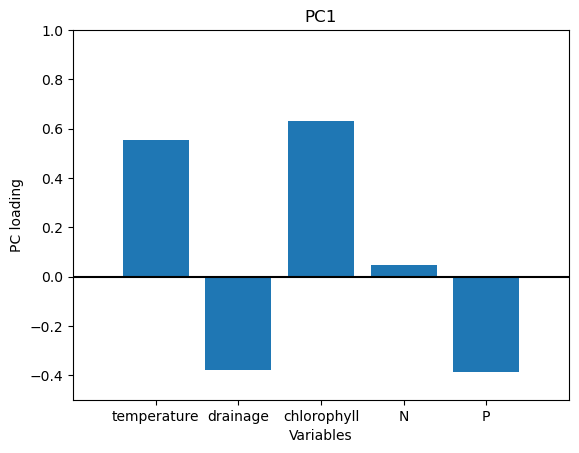

In [13]:
plt.figure(2)
plt.bar(np.arange(1, 6, 1), loadings[:, 0]) # Create a bar chart with numbers of variables on the horizontal axis and loadings on the vertical axis
plt.axhline(color = 'black') # Draw a black horizontal line indicating a loading of zero.
plt.xlim([0, 6]) # Set the limits on the horizontal axis
plt.ylim([-0.5, 1]) # Set the limits on the vertical axis
plt.xticks(np.arange(1, 6, 1), ['temperature', 'drainage', 'chlorophyll', 'N', 'P']) # Add names for the variables
plt.title('PC1') # Provide a title
plt.xlabel('Variables') # Provide horizonal axis title
plt.ylabel('PC loading') # Provide vertical axis title

**Exercise 4**: Make the same plot for the other principal components.

Text(0, 0.5, 'PC loading')

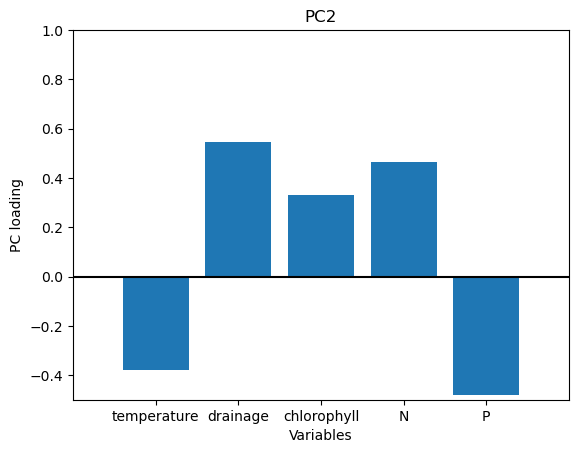

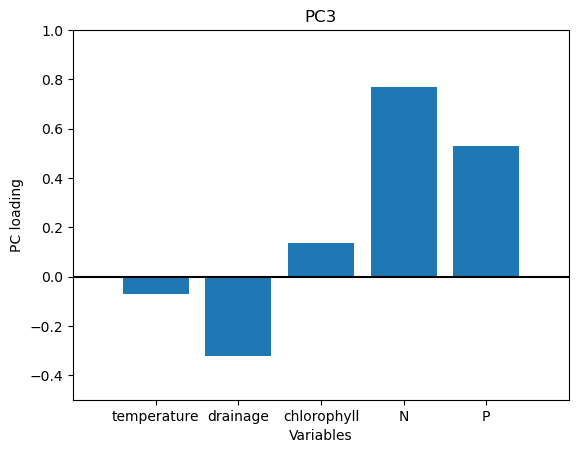

In [15]:
plt.figure(3)
plt.bar(np.arange(1, 6, 1), loadings[:, 1]) # Create a bar chart with numbers of variables on the horizontal axis and loadings on the vertical axis
plt.axhline(color = 'black') # Draw a black horizontal line indicating a loading of zero.
plt.xlim([0, 6]) # Set the limits on the horizontal axis
plt.ylim([-0.5, 1]) # Set the limits on the vertical axis
plt.xticks(np.arange(1, 6, 1), ['temperature', 'drainage', 'chlorophyll', 'N', 'P']) # Add names for the variables
plt.title('PC2') # Provide a title
plt.xlabel('Variables') # Provide horizonal axis title
plt.ylabel('PC loading') # Provide vertical axis title

plt.figure(4)
plt.bar(np.arange(1, 6, 1), loadings[:, 2]) # Create a bar chart with numbers of variables on the horizontal axis and loadings on the vertical axis
plt.axhline(color = 'black') # Draw a black horizontal line indicating a loading of zero.
plt.xlim([0, 6]) # Set the limits on the horizontal axis
plt.ylim([-0.5, 1]) # Set the limits on the vertical axis
plt.xticks(np.arange(1, 6, 1), ['temperature', 'drainage', 'chlorophyll', 'N', 'P']) # Add names for the variables
plt.title('PC3') # Provide a title
plt.xlabel('Variables') # Provide horizonal axis title
plt.ylabel('PC loading') # Provide vertical axis title

**Question 6:** Based on the plot above, what do you think is the physical meaning of the first three principle components?

**Answer 6:** 
PC1
Observation: Very strong positive loading of Temperature and Chlorophyl.
Strong negative loading of drainage and P.
Looks like the signal originating from summer.

PC2
Observation: Positive loading of drainage, Chlorophyl and N.
Negative loading of temperature and P.
This could be more associated with winter.
However, since PC1 and PC2 are by definition uncorrelated, this may be a bit unlikely (we expect an anticorrelation between the summer and winter signal under normal circumstances). Perhaps a "spring signal" is a better interpretation for this principle component. The high drainage loading can be explained by the influx of meltwater from glaciers during this season.

PC3
Observation: Strong positive loading of N and P.
Negative loading of drainage.
This really captures the influx and concentration of pollutants (N and P).

The goal of principal component analysis is to transform several correlated variables into fewer uncorrelated principal components (that maximize variance).

**Question 7:** How can we check if we succeeded in doing this?

**Answer 7:** We can look at the correlation between the variables and between the principle components to see if the latter is lower than the former.

**Exercise 5:** Use a function that you used in **Lab03** and **Lab04** to check for correlation between variables on the original data, the preprocessed data and on the principle components (the "transformed data") to check if our PCA did what it was supposed to do.

In [19]:
print(np.flipud(np.corrcoef(lab05['data'])))

[[0.99999863 0.99999951 0.99999952 ... 0.99999766 0.99999693 1.        ]
 [0.99999149 0.99999443 0.99999645 ... 0.99999995 1.         0.99999693]
 [0.99999273 0.99999541 0.99999711 ... 1.         0.99999995 0.99999766]
 ...
 [0.99999802 0.99999947 1.         ... 0.99999711 0.99999645 0.99999952]
 [0.99999937 1.         0.99999947 ... 0.99999541 0.99999443 0.99999951]
 [1.         0.99999937 0.99999802 ... 0.99999273 0.99999149 0.99999863]]


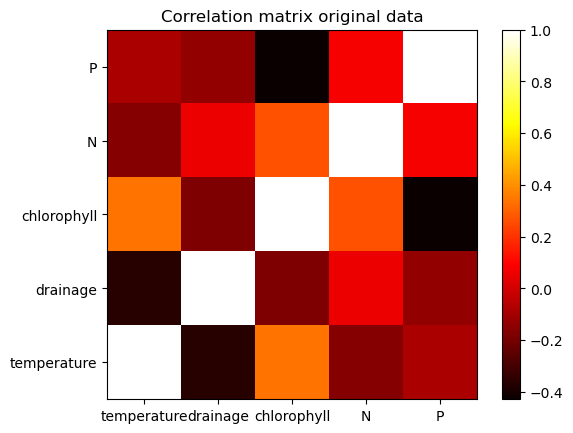

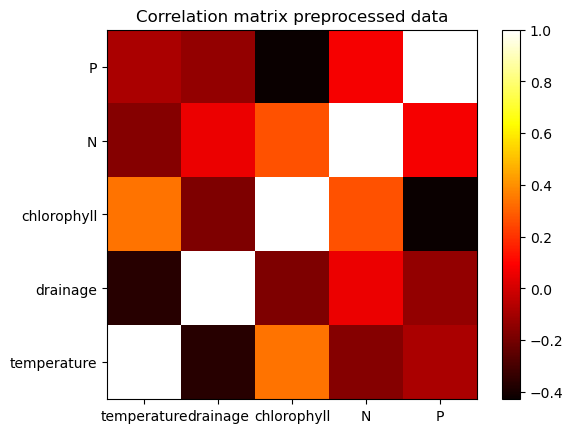

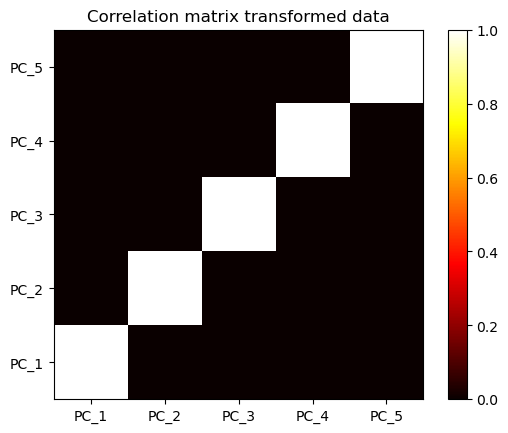

In [41]:
original_corr = np.corrcoef(lab05['data'], rowvar = False) # Create a correlation matrix of the original data
preprocessed_corr = np.corrcoef(standardized_data, rowvar = False) # Create a correlation matrix of the preprocessed data
transformed_corr = np.corrcoef(scores, rowvar = False) # Create a correlation matrix of the transformed data

variables = ['temperature', 'drainage', 'chlorophyll', 'N', 'P'] # Create a vector of variable names
PCs = ['PC_'+ str(i + 1) for i in range(6)] # Create a vector of PC names

# Flip the correlation matrices for plotting:
original_corr_flipped = np.flipud(original_corr)
preprocessed_corr_flipped = np.flipud(preprocessed_corr)
transformed_corr_flipped = np.flipud(transformed_corr)

# Plot the correlation matrices with colors representing the degree of correlation:
plt.figure(1)
plt.imshow(original_corr_flipped, cmap = 'hot')
plt.title('Correlation matrix original data')
plt.xticks(np.arange(0, 5), [variables[i] for i in range(5)])
plt.yticks(np.arange(0, 5), [np.flipud(variables)[i] for i in range(5)])
plt.colorbar() # Display the colorbar as a legend

# Plot the correlation matrices with colors representing the degree of correlation:
plt.figure(2)
plt.imshow(preprocessed_corr_flipped, cmap = 'hot')
plt.title('Correlation matrix preprocessed data')
plt.xticks(np.arange(0, 5), [variables[i] for i in range(5)])
plt.yticks(np.arange(0, 5), [np.flipud(variables)[i] for i in range(5)])
plt.colorbar() # Display the colorbar as a legend

# Plot the correlation matrices with colors representing the degree of correlation:
plt.figure(3)
plt.imshow(transformed_corr_flipped, cmap = 'hot')
plt.title('Correlation matrix transformed data')
plt.xticks(np.arange(0, 5), [PCs[i] for i in range(5)])
plt.yticks(np.arange(0, 5), [np.flipud(PCs)[i] for i in range(1, 6)])
plt.colorbar() # Display the colorbar as a legend

**Question 8:** Do the lots above show the outcome you expect?

**Answer 8:** Yes, they show that the original variables are correlated. The preprocessing does not change that but the principle components have no correlation at all.

To find out what our principle components mean, let’s now have a look at time series plots of the principal component scores from the first three principal components. To compare time series and interpret results, it might be better to use subplots:

Text(0, 0.5, 'PC score')

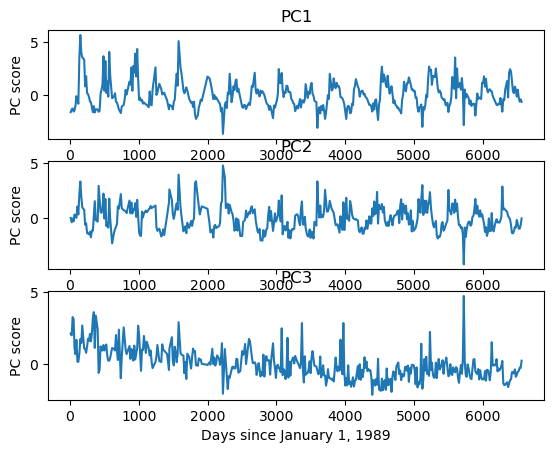

In [25]:
plt.figure(1)
plt.subplot(311)
plt.plot(lab05['T'], scores[:, 0])
plt.title('PC1')
plt.ylabel('PC score')
plt.subplot(312)
plt.plot(lab05['T'], scores[:, 1])
plt.title('PC2')
plt.ylabel('PC score')
plt.subplot(313)
plt.plot(lab05['T'], scores[:, 2])
plt.title('PC3')
plt.xlabel('Days since January 1, 1989')
plt.ylabel('PC score')

**Question 9:** Based on the plots you just created, do you still agree with the interpretation of the pronciple components you made in your answer to **Question 7**?

**Answer 9:** 
PC1: It does indeed look that this component is mostly high in the summer
PC2: This is not really a winter signal, but more a spring/autumn component
PC3: It could represent pollution, although in that case I am not sure if I would expect it to drop since 1989...
Perhaps new environmental laws and regulations cause the pollution component to drop over time?